<a id="top"></a>
# **3.2 Pullout curve versus bond length**

<a href="https://moodle.rwth-aachen.de/mod/page/view.php?id=551819"><img src="../icons/bmcs_video.png" alt="Run"></a> part 1

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="40" height="40">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

In the previous notebook [3.1 Hardening and softening](3_1_nonlinear_bond.ipynb#top) we have seen that the effect of the softening 
in the bond-slip law affects the pullout response in a qualitatively different way than a constant or increasing shear stress for a growing slip.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="40" height="40">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 

To deepen our understanding of the correspondence between the bond length and maximum achievable pullout force we will 
study the response in three case studies. With the pullout model introduced in notebook [3.1](3_1_nonlinear_bond.ipynb#model)
we will simulate the pullout curve for a changing bond length and extract characteristic points of the structural response.
In particular, we are interested in the trend of the maximum pullout force versus the bond length.

**Quality of a model = our level of understanding:** We can establish a direct relation between the level of our understanding of the observed phenomena, e.g. pull-out behavior, and the quality of the models we are able to construct. The better the model, the more general the design rules can be formulated. Thus, the validity of the model is a central issue.

**Before starting to experiment:** Therefore, when designing experimental setups, it is necessary 
 - to **formulate a hypothesis** how the phenomenology works
 - to provide **several perspective of observation** by changing some parameters
 
Indeed, the change of the bond length is an easy way how to extract much more information from the test then if only single geometrical configuration is used. 

**Parametric studies:** The notebook demonstrates an important discipline of engineering research, namely the aim to capture the dependency between the material behavior, geometrical configuration by simple **design formulas** and rules 
**applicable in engineering practice**. Many design formulas are derived **empirically**, based solely on 
thorough experimental studies. With an increasing quality, or more precisely, **validity of the models**, some design configurations can be also covered based on the simulation results. In the subsequent studies, we will use a model and as a virtual experiment to demonstrate the derivation of a formula for **anchorage length**, i.e. the minimum necessary bond length that guarantees the full utilization of the reinforcement.

<a id="trc_pullout_study"></a>
# **Case study 1: textile reinforced concrete**

To characterize the bond behavior between carbon fabrics penetrated with rubber-like material the test setup with a variable bond length has been studied in [Li et al. (2018)](../papers/Li_Bielak_Hegger_Chudoba_2017.pdf). This symmetric, double-sided pullout-test was chosen to appropriately reflect the condition of a typical crack bridge as it occurs in structural TRC members under tensile or bending loads.

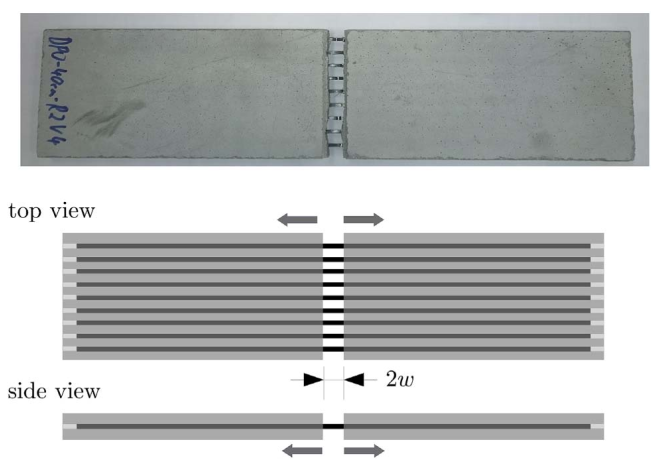

## Test setup with symmetric debonding

In the test setup, a TRC specimen with a notch on both faces at the middle section is clamped using hydraulic cylinders.The proposed test setup induces high transversal stress into the anchorage zone of the specimen. For non-impregnated yarns and yarns with a flexible impregnation, e.g. styrene-butadiene, the bond characteristics are not influenced by transversal pressure if the concrete remains uncracked in longitudinal direction. Due to the low stiffness of the yarns in comparison to the concrete in transversal direction, the transversal pressure is transferred by small concrete vaults, forming around the yarn channels.

![image.png](../fig/trc_carbon_crack_bridge_study.png)

<a id="trc_test_results"></a>
## Test specimens and measured results

![image.png](../fig/trc_carbon_crack_bridge_study_results.png)

<a id="trc_parameters"></a>
| Material parameter | Value | Unit |
|:- | -:| -:|
| matrix area | 1543 | [mm$^2$] |
| matrix stiffness | 28.5 | [GPa] |
| reinforcement area | 16.7 | [mm$^2$] |
| reinforcement stiffness | 170 | [GPa] |
| bond perimeter | 10 | [mm] |
| specimen length | 200-700 | [mm] |
| fabric strength | 1300 | [MPa] |

The paper [Li et al. (2018)](../papers/Li_Bielak_Hegger_Chudoba_2017.pdf) describes an automatic calibration of the bond slip law. The resulting bond-slip law is used here to reproduce the length-dependency of the pullout response of the cross section described above. We will now use the ```PullOutModel1D``` to 
reproduce the test results with the bond slip law identified in the paper.

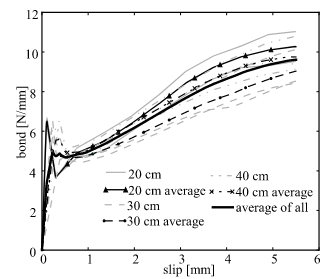

**Comment on the shape of the material law:** The diagram above shows the result of the automated bond-slip calibration that has been performed for several tested lengths to validate if the algorithm will derive the same bond-slip law from all the performed tests. 
Let us remark the unusual shape of the pullout curve exhibiting a first peak followed by a small drop down and subsequent increase of the bond level. This kind of behavior explained by a so called jamming effect due to increasing the lateral pressure in the interface zone between the fiber and matrix.

Let us apply the derived average bond-slip law in a study to investigate and illuminate the correspondence between this type of hardening bond-slip law and pullout response. Recall that only a half of the specimen is simulated so that the pullout displacement in the model is equivalent to the half of the crack bridge displacement measured in the test. See a remark to the validity of the applied [symmetry assumption](#symmetry_assumption) below.
<a id="case_study_1"></a>

In [3]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np
from bmcs_cross_section.pullout import PullOutModel1D

In [4]:
po_trc = PullOutModel1D(n_e_x=100, w_max=6) # mm 
po_trc.material_model='trilinear'
po_trc.geometry.L = 100
po_trc.material_model_.trait_set(E_m=28000, E_f=180000, tau_1=5.5, tau_2=8, s_1=0.07, s_2=6)
po_trc.interact()

<div style="background-color:lightgray;text-align:left"> <img src="../icons/run.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <b>Run in a loop along the changing bond length</b> </div>

The model `po_trc` chould be again used to interactively, however, we will directly apply the automated evaluation to find the dependence between the maximum pullout force and the bond length. Let us extend the loop that we previously introduced in the notebook [3.1](3_1_nonlinear_bond.ipynb#crfp_study). Instead of plotting the results directly after each simulation `run`, let us now store the pullout curves in a list called `Pw_list`. The `history` attribute of the model provides the method `get_Pw_t` delivering three data arrays, namely the force and the corresponding two displacements at unloaded and loaded ends. Thus, the calculated arrays are obtained by writing
```python
P, w_unloaded, w_loaded = po_trc.history.get_Pw_t()
```
In the code below, we let all the three arrays in a single variable called ``Pw_t`` and append this tuple of three values into the list ``Pw_list`` collecting the results for each studied length from the list ``L_list``

In [10]:
L_list = [100, 150, 200, 250, 300, 350]
Pw_list = []
po_trc.w_max = 6
for L in L_list:
    print('evaluating pullout curve for L', L)
    po_trc.geometry.L_x=L
    po_trc.reset()
    po_trc.run()
    Pw_t = po_trc.history.get_Pw_t()
    Pw_list.append(Pw_t)

evaluating pullout curve for L 100
evaluating pullout curve for L 150
evaluating pullout curve for L 200
evaluating pullout curve for L 250
evaluating pullout curve for L 300
evaluating pullout curve for L 350


**Fiber rupture:** In addition to the parameters needed to simulate the debonding, let us also define the fabric strength so that we can plot the breaking force of the reinforcement $f_{\mathrm{trc,t}} = 1300$ MPa. Then the rupture force force is evaluated as
\begin{align}
P_\mathrm{fu} = A_\mathrm{f} f_{\mathrm{trc,t}}
\end{align}

In [8]:
f_trc_t = 1300 # [MPa]
P_fu = po_trc.cross_section.A_f * f_trc_t # [N]
P_fu / 1000 # [kN]

200.07

<div style="background-color:lightgray;text-align:left"> <img src="../icons/view.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <b>... plot and decorate the results</b> </div>

The data of all studies is stored in the list `Pw_list`. Let us now loop over this list, associate every study with a color and 
show the pull-out curves in a single diagram refered to as `ax`. In parallel, we extract the maximum pullout force from each study and associate it with the respective bond length. This information is plotted in the diagram `ax_P_L`.

In [9]:
fig, (ax, ax_P_L) = plt.subplots(1,2, figsize=(10,4), tight_layout=True)
fig.canvas.header_visible = False
P_max_list = []
for Pw_t, L, color in zip(Pw_list, L_list, ['red','green','blue','black','orange','gray']):
    P_range, w_unloaded, w_loaded = Pw_t
    ax.plot(w_loaded, P_range/1000, color=color, linestyle='solid', label=r'$L_\mathrm{b}$ = %d' % L)
    ax.plot(w_unloaded, P_range/1000, color=color, linestyle='dashed')
    P_max = np.max(P_range)/1000 # kN
    P_max_list.append(P_max)
# Plotting
ax.set_xlabel(r'half of crack opening $w/2$ [mm]'); ax.set_ylabel(r'$P$ [kN]')
ax.legend()
ax_P_L.plot(L_list, P_max_list, 'o-', color='blue', label=r'$P_\mathrm{max}$')
ax_P_L.set_xlabel(r'bond length $L_\mathrm{b}$ [mm]')
ax_P_L.set_ylabel(r'pullout force $P_\mathrm{max}$ [kN]')
ax_P_L.set_xlim(xmin=0); ax_P_L.set_ylim(ymin=0)
ax.plot([0, 6], [P_fu/1000, P_fu/1000], linestyle='dashed', linewidth=1, color='red', label='breaking force' );
ax_P_L.plot([0, 350], [P_fu/1000, P_fu/1000], linestyle='dashed', linewidth=1, color='red', label='breaking force' );
ax_P_L.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<a id="hardening_parametric_study"></a>

## **Comments** to the study
 - **Anchorage length**: The relation between the maximum pullout force and the bond length is linear and reaches the breaking force of the reinforcement at the length 250 mm. Comparing this value with the experimental observation, we see that the breaking load exhibits a huge scatter. It is therefore impossible to specify the deterministic value of the fabric strength. 
 - **Scatter of breaking force**: What is the reason for the experimentally observed scatter of the force at which the fabric breaks? We cannot expect that the pullout force is distributed evenly across the cross section. The statistical aspects of a parallel fiber bundle significantly affect the response of the material that needs to be accounted for in the design rules of textile fabric composites. In case of brittle fabrics this issue **must** included in the reliable design concept.
 <a id="symmetry_assumption"></a>
 - **Symmetric debonding in both directions**: The fact that the test is designed as symmetric raises the question if the debonding runs symmetrically in both directions, particularly in the context of an existing scatter in the material properties across the fabrics and bond structure. The answer is, that as far as the pullout (crack-bridge) force increases, the differences on both sides will balance each other. A weaker spot on a one side will lead to a faster increment of debonding upon increasing the bridging force transferred over the debonded zone. Due to hardening bond, the larger debonded length will be able to increase the amount of transfered force. To compensate this, the other side will have to balance this by a further debonding. This **balancing of debonding**, however, can only be assumed for an ascending branch of the pullout curve. If one side of the fabric starts to pullout with a decreasing force, the debonding process becomes one-sided.  

# **Case study 2: Anchorage and constant bond-slip law**

<a href="https://moodle.rwth-aachen.de/mod/page/view.php?id=551819"><img src="../icons/bmcs_video.png" alt="Run"></a> part 2

The first study using a hardening law has shown that the maximum pullout force increases nearly linearly
up to the failure of the reinforcement. Derivation of such a trend was our goal to have an idea how 
to derive a formula for the assessment of anchorage length. 
To provide a more straightforward derivation of this trend let us again consider a constant bond-slip law
and provide a simple analytical expression for the relation between the bond length and the maximum pullout load.
We will again make use of the `sympy` and `numpy` packages

In [6]:
import sympy as sp
import numpy as np
sp.init_printing()

Recall that the pull-out model with constant bond strength presented in
the notebook [2.1](../tour2_constant_bond/2_1_1_PO_observation.ipynb#top) 
predicts a square root function
\begin{align}
P_w = \sqrt{A_\mathrm{f} E_\mathrm{f} p_\mathrm{b} \bar{\tau} w}
\end{align}
so that we can express it in `sympy` as 

In [7]:
p_b, tau, E_f, A_f, L_b, w = sp.symbols(r'p_b, tau, E_f, A_f, L_b, w')
P_w = sp.sqrt(p_b*tau*E_f*A_f*w)
P_w

Once the debonding reached the end of the bond length $L_\mathrm{b}$, the pull out force can grow up to the maximum load of 
\begin{align}
P_\max = L_\mathrm{b} p_\mathrm{b} \bar{\tau}
\end{align}

In [8]:
P_max = L_b * p_b * tau
P_max

**This is actually the equation wee seek!** The right diagram of the parametric study [performed above](#hardening_parametric_study)  

To cover both phases of the pullout process, let us construct a piecewise function which the plateau after reaching the value $P_\max$

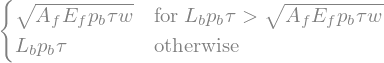

In [9]:
P_w_pull = sp.Piecewise( 
    (P_w, P_w < P_max),
    (P_max, True)
)
P_w_pull

With these equation we can quickly reinterpret the results obtained numerically in [study 1](#case_study_1)

| Material parameter | Value | Unit |
|:- | -:| -:|
| matrix area | 1543 | [mm$^2$] |
| matrix stiffness | 28.5 | [GPa] |
| reinforcement area | 16.7 | [mm$^2$] |
| reinforcement stiffness | 170 | [GPa] |
| bond perimeter | 10 | [mm] |
| specimen length | 200-700 | [mm] |
| fabric strength | 1300 | [MPa] |

With these parameters we can require the anchorage length at which the fiber breaks by setting
\begin{align}
\tau_\mathrm{fu} = \dfrac{P_\mathrm{fu}}{p_\mathrm{b} L_\mathrm{b}}
\end{align}
and set $L_\mathrm{b}=250$ to obtain the same anchorage curve as in [study 1](#case_study_1) 

In [10]:
tau_fu = P_fu / 10 / 250 
tau_fu # [MPa]

<div style="background-color:lightgray;text-align:left"> <img src="../icons/view.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <b>... and plot it</b> </div>

In [11]:
get_P_w_pull = sp.lambdify((w, p_b, tau, E_f, A_f, L_b), P_w_pull, 'numpy')
get_P_max = sp.lambdify((L_b, p_b, tau), P_max, 'numpy' )
# breaking force
w_range = np.linspace(0, 6, 100)
fig, (ax, ax_P_L) = plt.subplots(1,2, figsize=(10,4), tight_layout=True)
fig.canvas.header_visible=False
L_list = np.array([100, 150, 200, 250, 300, 350])
for L in L_list:
    ax.plot(w_range, get_P_w_pull(w_range, p_b=10, tau=tau_fu, E_f=170000, A_f=16.7, L_b = L) / 1000, label=r'$L_\mathrm{b}$ = %d' % L)
ax.set_title(r'Pullout curves for variable bond length with constant bond slip');
ax.set_xlabel(r'$w$ [mm]'); ax.set_ylabel(r'$P$ [kN]')
ax.legend()
ax_P_L.plot(L_list, get_P_max(L_list, p_b=10, tau=tau_fu)/1000, 'o-', color='blue', label=r'$P_\mathrm{max}$')
ax_P_L.set_xlabel(r'bond length $L_\mathrm{b}$ [mm]')
ax_P_L.set_ylabel(r'pullout force $P_\mathrm{max}$ [kN]')
ax_P_L.set_xlim(xmin=0); ax_P_L.set_ylim(ymin=0)
ax_P_L.plot([0, 350], [P_fu/1000, P_fu/1000], linestyle='dashed', linewidth=2, color='red', label='breaking force' );
ax_P_L.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## **Comment:**
 - Note that the anchorage length diagrams in [study 1](#case_study_1) with a nonlinear hardening law and the constant bond-slip law used in study 2 shown above are equal, even if the pull-out curves on the left are different. To explain this, compare the bond state at failure for a selected bond length. The shear profile at failure will be very similar because the a relatively large value of slip has been achieved  over the whole bond length so that the shear stress is nearly uniform already. Verify this statement by using the interactive interface of `po_trc` and render it.

# **Case study 3: CFRP sheet revisited**

<a href="https://moodle.rwth-aachen.de/mod/page/view.php?id=551819"><img src="../icons/bmcs_video.png" alt="Run"></a> part 3

To complete the picture with the case of softening bond-slip law, let us extend the study previously presented [for CFRP sheets in notebook 3.1](3_1_nonlinear_bond.ipynb#cfrp_sheet_test) with the goal and construct the relation between the bond length $L_\mathrm{b}$ and the maximum pullout force $P_\max$. 

## Model construction

In [12]:
po_cfrp = PullOutModel1D(n_e_x=200, w_max=1) # mm 
po_cfrp.geometry.L_x=100
po_cfrp.time_line.step = 0.02
po_cfrp.cross_section.trait_set(A_m=400*200, A_f=100*0.11, P_b=100)
po_cfrp.material_model='trilinear'
po_cfrp.material_model_.trait_set(E_m=28000, E_f=230000, tau_1=5.5, tau_2=0, s_1=0.07, s_2=0.4)
po_cfrp.interact()

<div style="background-color:lightgray;text-align:left"> <img src="../icons/run.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <b>Run in a loop along the changing bond length</b> </div>

To study the dependence between the maximum pullout force and the bond length, let us extend the loop that we previously introduced in the notebook [3.1](3_1_nonlinear_bond.ipynb#crfp_study). Instead of plotting the results directly after each simulation `run`, let us now store the pullout curves in a list called `Pw_list`. The `history` attribute of the model provides the method `get_Pw_t` delivering three data arrays, namely the force and the corresponding two displacements at unloaded and loaded ends. 

In [13]:
L_list = [5, 10, 50, 100, 200]
Pw_list = []
for L in L_list:
    print('evaluating pullout curve for L', L)
    po_cfrp.geometry.L_x=L
    po_cfrp.reset()
    po_cfrp.run()
    Pw_t = po_cfrp.history.get_Pw_t()
    Pw_list.append(Pw_t)

evaluating pullout curve for L 5
evaluating pullout curve for L 10
evaluating pullout curve for L 50
evaluating pullout curve for L 100
evaluating pullout curve for L 200


<div style="background-color:lightgray;text-align:left"> <img src="../icons/view.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <b>... let us put the results into the same diagrams as above</b> </div>

In addition to the maximum pullout load, we also include the evolution of the pullout displacement at when the maximum load has been reached, denoted as $w_\mathrm{argmax}$

In [14]:
fig, (ax, ax_P_L) = plt.subplots(1,2, figsize=(10,4), tight_layout=True)
ax_w_L = ax_P_L.twinx()
fig.canvas.header_visible = False
P_max_list = []
w_argmax_list = []
for Pw_t, L, color in zip(Pw_list, L_list, ['red','green','blue','black','orange']):
    P_range, w_unloaded, w_loaded = Pw_t
    ax.plot(w_loaded, P_range/1000, color=color, linestyle='solid', label=r'$L_\mathrm{b}$ = %d' % L)
    ax.plot(w_unloaded, P_range/1000, color=color, linestyle='dashed')
    P_max = np.max(P_range)/1000 # kN
    w_argmax = w_loaded[np.argmax(P_range)]
    P_max_list.append(P_max)
    w_argmax_list.append(w_argmax)
    ax.plot([w_argmax], [P_max], 'o', color=color)
# Plotting
ax.set_xlabel(r'$w$ [mm]'); ax.set_ylabel(r'$P$ [kN]')
ax.legend()
ax_P_L.plot(L_list, P_max_list, 'o-', color='blue', label=r'$P_\mathrm{max}$')
ax_P_L.set_xlabel(r'bond length $L_\mathrm{b}$ [mm]')
ax_P_L.set_ylabel(r'pullout force $P_\mathrm{max}$ [kN]')
ax_P_L.set_xlim(xmin=0); ax_P_L.set_ylim(ymin=0)
ax_P_L.legend(loc=4)
ax_w_L.plot(L_list, w_argmax_list, 'o-', color='orange', label=r'$w_\mathrm{argmax}$')
ax_w_L.set_ylabel(r'pullout displacement at $P_\mathrm{max}$ [mm]')
ax_w_L.set_ylim(ymin=0);
ax_w_L.legend(loc=5);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## **Discussion:** 
 - Comparing the result with the non-softening laws shown in the studies 1 and 2 above, the evolution of the maximum pullout force with the increasing debonded length displayed in the right diagram is nonlinear and reaches the plateau at $L_b \approx 0.75$ mm.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/exercise.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <a href="../exercises/X0303 - Anchorage length.pdf"><b>Exercise X0303:</b></a> <b>Anchorage length</b> 
<a href="https://moodle.rwth-aachen.de/mod/page/view.php?id=551825"><img src="../icons/bmcs_video.png" alt="Run"></a>
</div>

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour3_nonlinear_bond/3_1_nonlinear_bond.ipynb#top">3.1 Nonlinear bond - softening and hardening</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour4_plastic_bond/4_1_PO_multilinear_unloading.ipynb#top">4.1 Loading unloading and reloading</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 